In [33]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

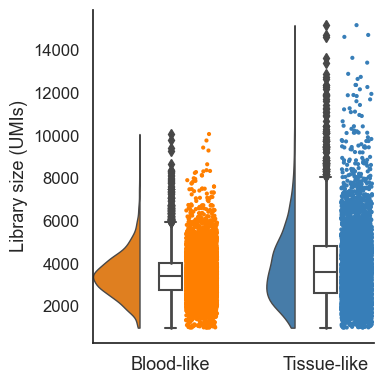

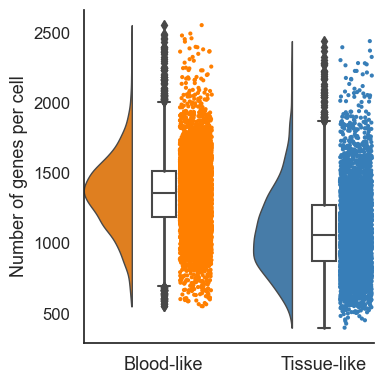

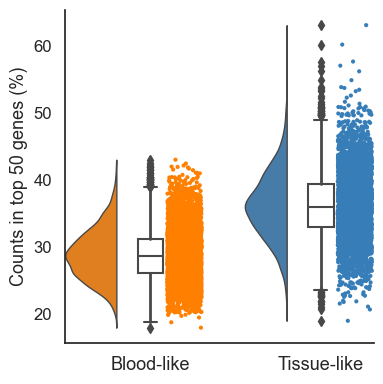

In [35]:
# Load the h5ad file
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Extract relevant columns into a DataFrame
df = adata.obs[[
    'broad_neutro_type', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {
    'Blood-like': '#ff7f00',
    'Tissue-like': '#377eb8'
}

# Set plot style
sns.set(style="white")

# Function to make raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(4, 4))
    pt.RainCloud(x='broad_neutro_type', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(y, fontsize=13)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell','')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)','')


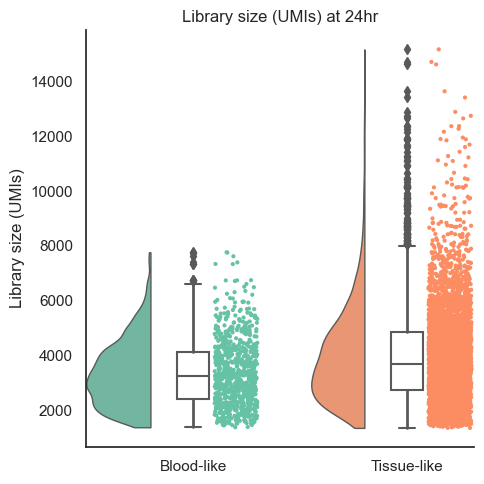

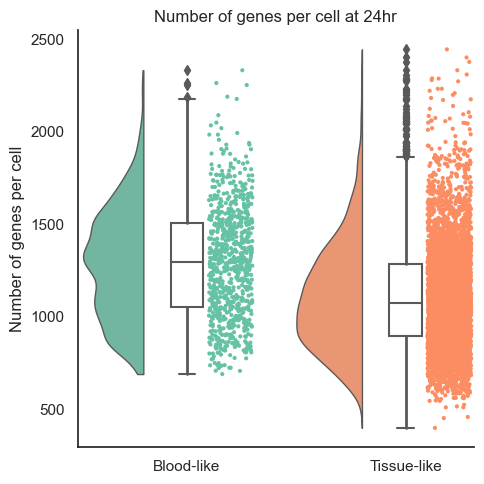

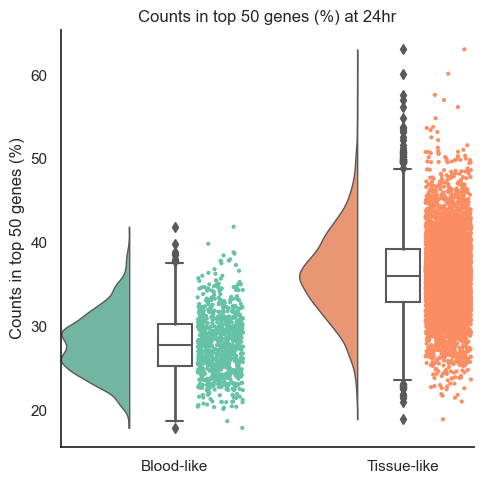

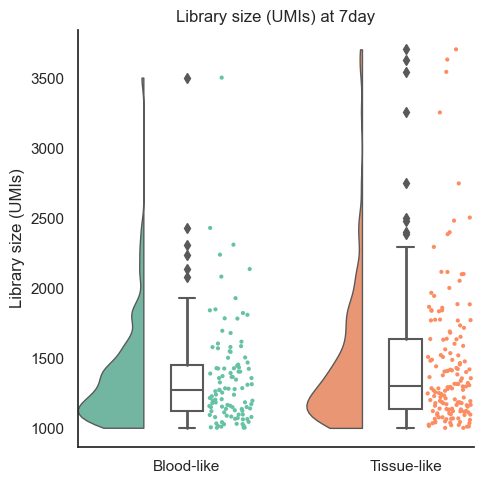

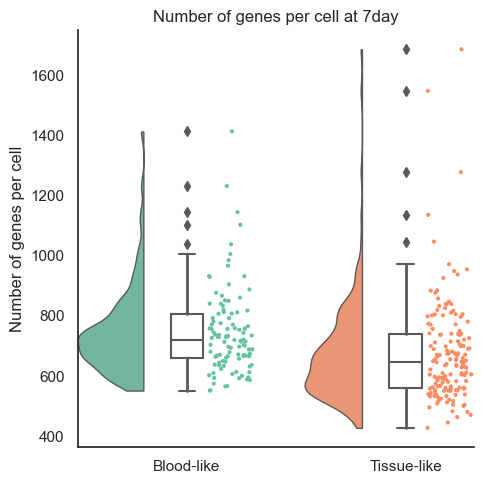

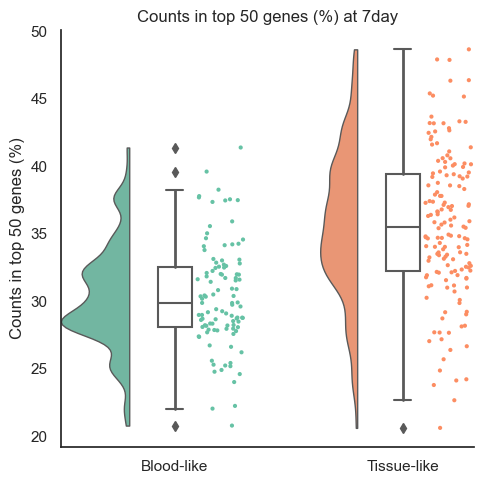

In [36]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# Load data
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Subset to 24hr and 7day only
adata = adata[adata.obs['time_point'].isin(['24hr', '7day'])]

# Create a DataFrame from .obs with only needed columns
df = adata.obs[[
    'time_point', 
    'broad_neutro_type',
    'total_counts',
    'n_genes_by_counts',
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for plot labels
df = df.rename(columns={
     'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})
# Plot style
sns.set(style="white")

# Function to plot one metric for one time point
def plot_raincloud(data, metric, time_label):
    f, ax = plt.subplots(figsize=(5, 5))
    pt.RainCloud(
        x='broad_neutro_type',
        y=metric,
        data=data,
        palette="Set2",
        width_viol=.6,
        ax=ax,
        orient='v',
        move=0.2
    )
    sns.despine(ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} at {time_label}", fontsize=12)
    plt.tight_layout()
    plt.show()

# Loop through time points and metrics
for tp in ['24hr', '7day']:
    df_tp = df[df['time_point'] == tp]
    for metric in ['Library size (UMIs)', 'Number of genes per cell', 'Counts in top 50 genes (%)']:
        plot_raincloud(df_tp, metric, tp)


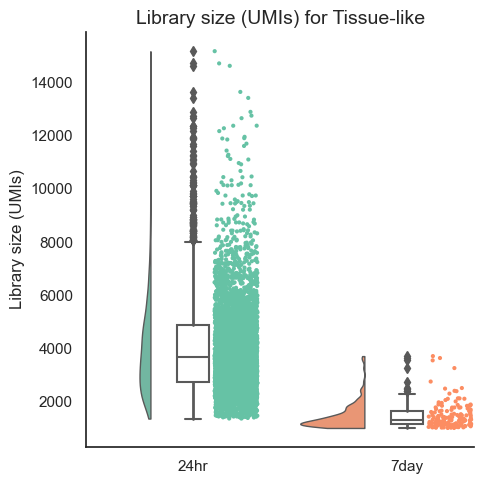

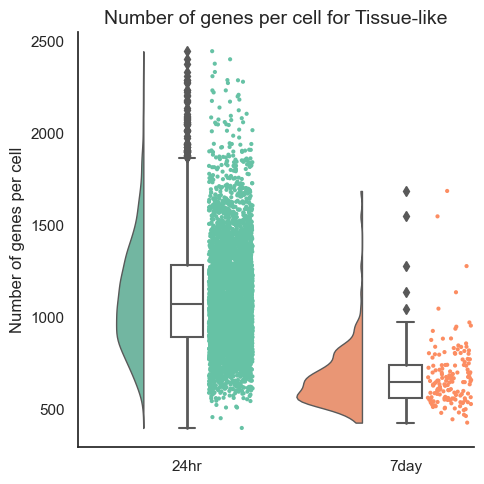

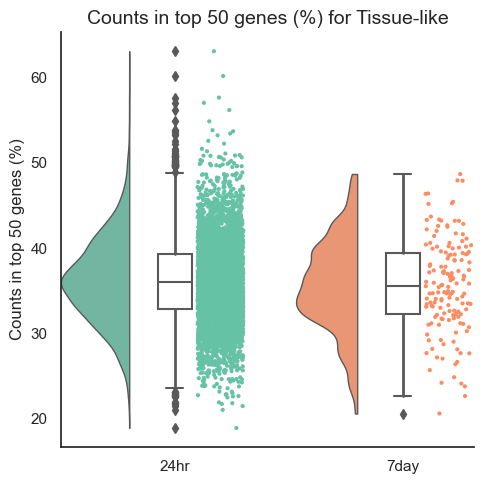

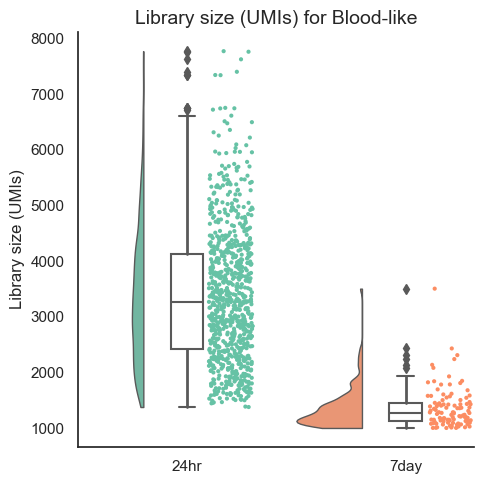

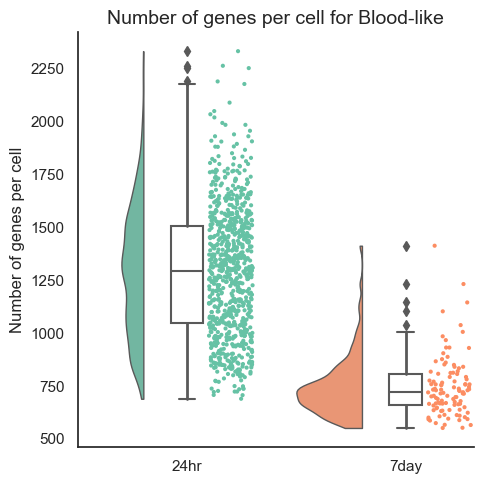

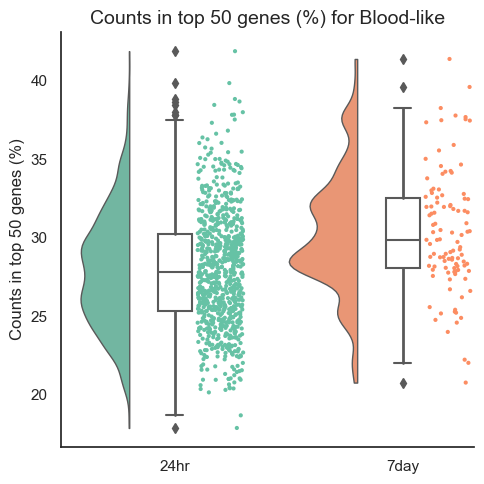

In [37]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# Load data
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Subset to 24hr and 7day only
adata = adata[adata.obs['time_point'].isin(['24hr', '7day'])]

# Create a DataFrame from .obs with only needed columns
df = adata.obs[[
    'time_point', 
    'broad_neutro_type',
    'total_counts',
    'n_genes_by_counts',
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for plot labels
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Set plot style
sns.set(style="white")

# Function to plot metrics by time point for a given neutrophil type
def plot_raincloud_by_neutro_type(data, metric, neutro_label):
    f, ax = plt.subplots(figsize=(5, 5))
    pt.RainCloud(
        x='time_point',
        y=metric,
        data=data,
        palette="Set2",
        width_viol=.6,
        ax=ax,
        orient='v',
        move=0.2
    )
    sns.despine(ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} for {neutro_label}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Loop over neutrophil types and metrics
neutro_types = df['broad_neutro_type'].unique()
metrics = ['Library size (UMIs)', 'Number of genes per cell', 'Counts in top 50 genes (%)']

for neutro in neutro_types:
    df_sub = df[df['broad_neutro_type'] == neutro]
    for metric in metrics:
        plot_raincloud_by_neutro_type(df_sub, metric, neutro)


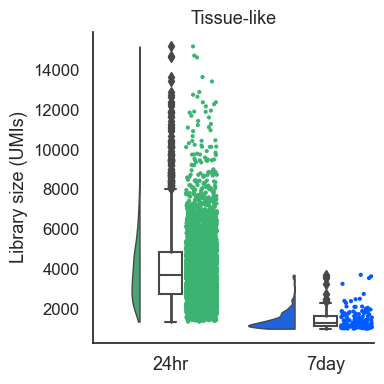

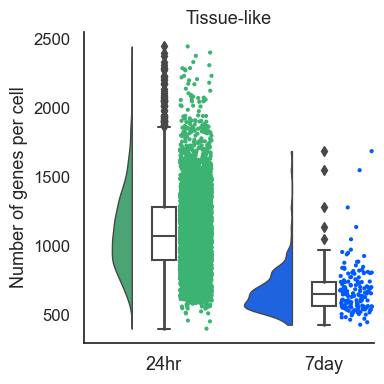

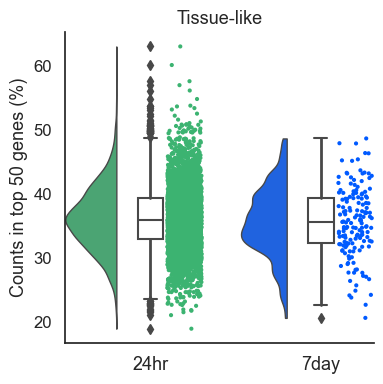

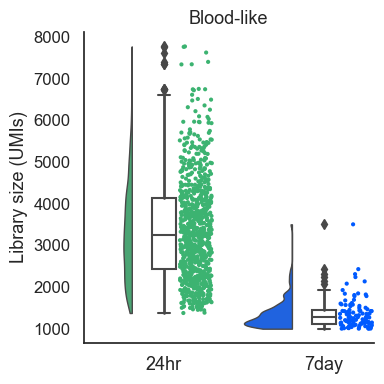

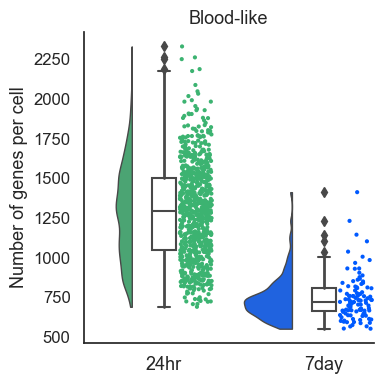

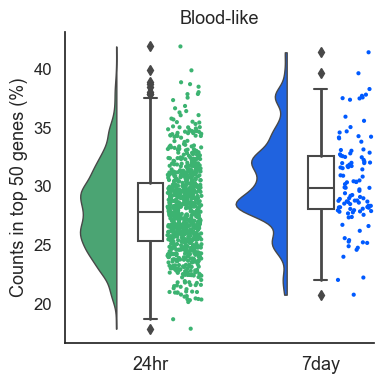

In [38]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# Load data
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Subset to 24hr and 7day only
adata = adata[adata.obs['time_point'].isin(['24hr', '7day'])]

# Create a DataFrame from .obs with only needed columns
df = adata.obs[[
    'time_point', 
    'broad_neutro_type',
    'total_counts',
    'n_genes_by_counts',
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for plot labels
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Set plot style
sns.set(style="white")

# Define custom color palettes
neutro_palette = {
    'blood-like': '#ff7f00',
    'tissue-specific': '#377eb8'
}

time_palette = {
    '24hr': '#3cb371',
    '7day': '#005aff'
}

# Function to plot metrics by time point for a given neutrophil type
def plot_raincloud_by_neutro_type(data, metric, neutro_label):
    f, ax = plt.subplots(figsize=(4, 4))
    pt.RainCloud(
        x='time_point',
        y=metric,
        data=data,
        palette=time_palette,
        width_viol=.6,
        ax=ax,
        orient='v',
        move=0.2
    )
    sns.despine(ax=ax)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(metric, fontsize=13)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_title(neutro_label, fontsize=13)
    plt.tight_layout()
    plt.show()

# Loop over neutrophil types and metrics
neutro_types = df['broad_neutro_type'].unique()
metrics = ['Library size (UMIs)', 'Number of genes per cell', 'Counts in top 50 genes (%)']

for neutro in neutro_types:
    df_sub = df[df['broad_neutro_type'] == neutro]
    for metric in metrics:
        plot_raincloud_by_neutro_type(df_sub, metric, neutro)


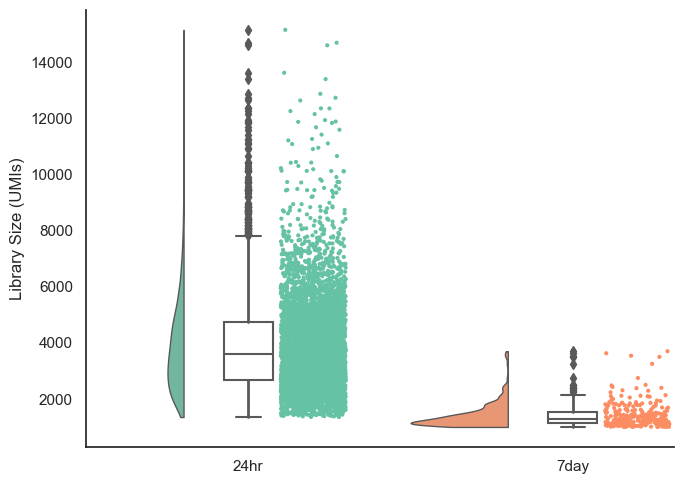

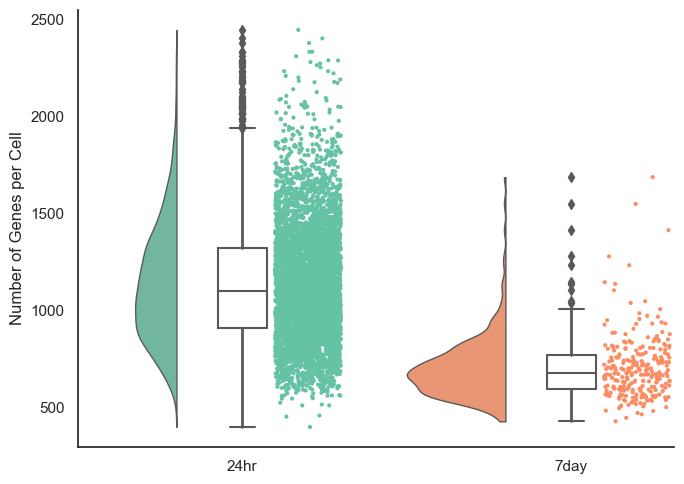

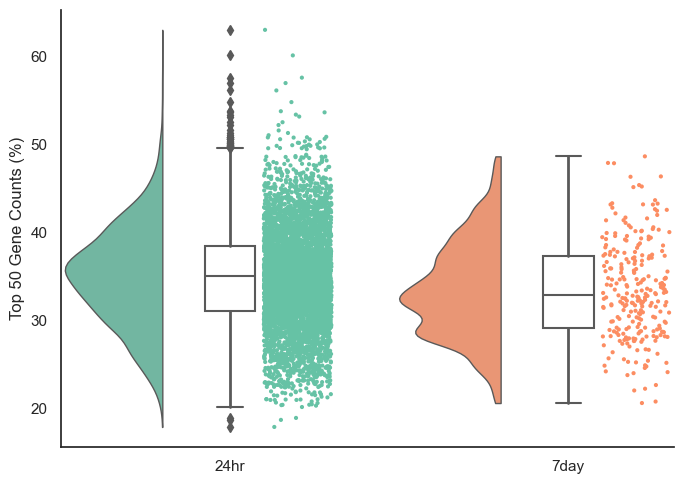

In [39]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# Load your data
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Filter for 24hr and 7day only
adata = adata[adata.obs['time_point'].isin(['24hr', '7day'])]

# Extract relevant columns
df = adata.obs[[
    'time_point',
    'total_counts',
    'n_genes_by_counts',
    'pct_counts_in_top_50_genes'
]].copy()

# Rename for clarity
df = df.rename(columns={
    'total_counts': 'Library Size (UMIs)',
    'n_genes_by_counts': 'Number of Genes per Cell',
    'pct_counts_in_top_50_genes': 'Top 50 Gene Counts (%)'
})

# Optional: remove categorical dtype to avoid seaborn warnings
df['time_point'] = df['time_point'].astype(str)

# Plot style
sns.set(style="white")
# Raincloud plot function
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(7, 5))
    pt.RainCloud(
        x='time_point',
        y=y,
        data=data,
        palette="Set2",
        width_viol=.6,
        ax=ax,
        orient='v',
        move=0.2,
    )
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('')
    ax.set_ylabel(y)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_raincloud(df, 'Library Size (UMIs)', '')
plot_raincloud(df, 'Number of Genes per Cell', '')
plot_raincloud(df, 'Top 50 Gene Counts (%)', '')


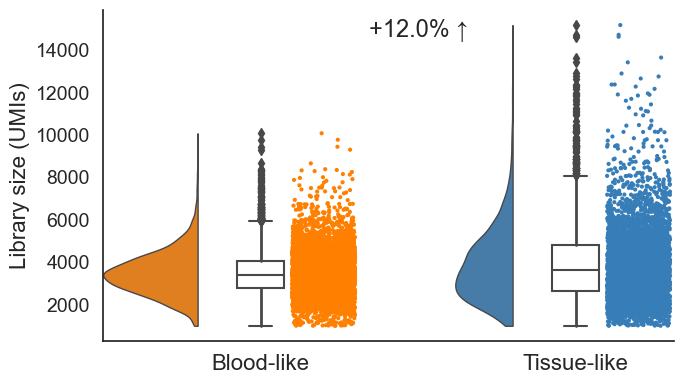

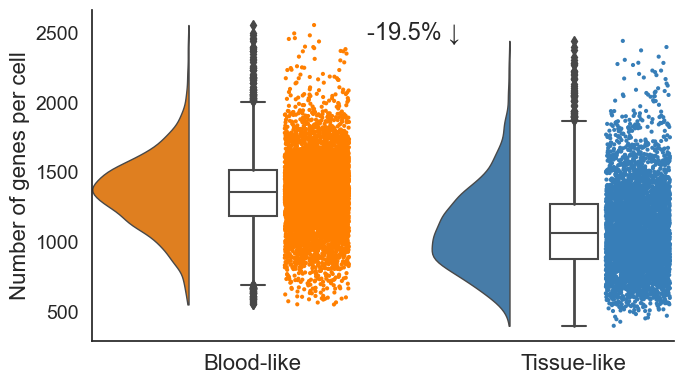

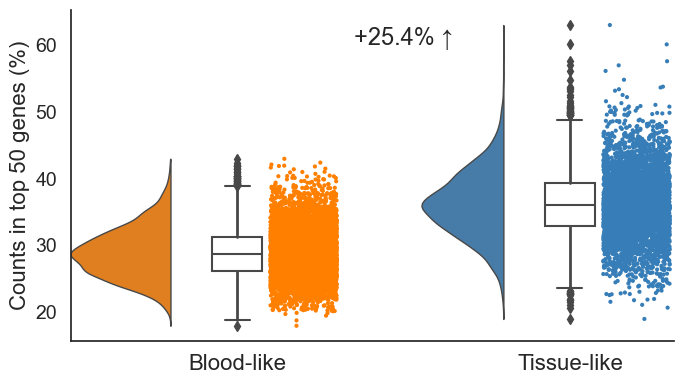

In [49]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

# Load the h5ad file
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Extract relevant columns into a DataFrame
df = adata.obs[[
    'broad_neutro_type', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {
    'Blood-like': '#ff7f00',
    'Tissue-like': '#377eb8'
}

# Set plot style
sns.set(style="white")

# Function to make annotated raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(7, 4))
    
    # Plot raincloud
    pt.RainCloud(x='broad_neutro_type', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    
    # Style
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('broad_neutro_type')[y].mean()
    if len(means) == 2:
        group1, group2 = means.index
        mean1, mean2 = means[group1], means[group2]
        percent_diff = ((mean2 - mean1) / mean1) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"
        
        # Centered annotation between violins
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92
        x_text = 0.5  # midpoint between violins
        
        ax.text(x_text, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')


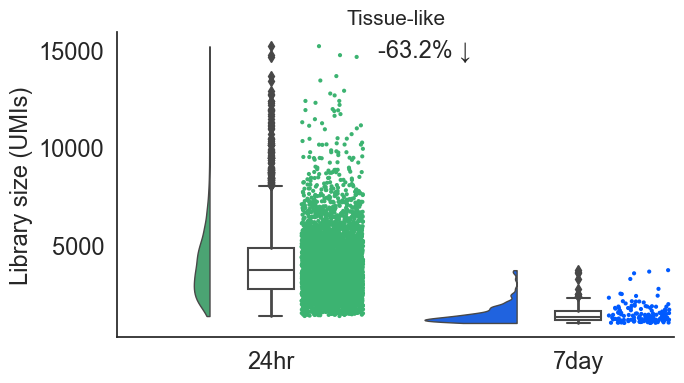

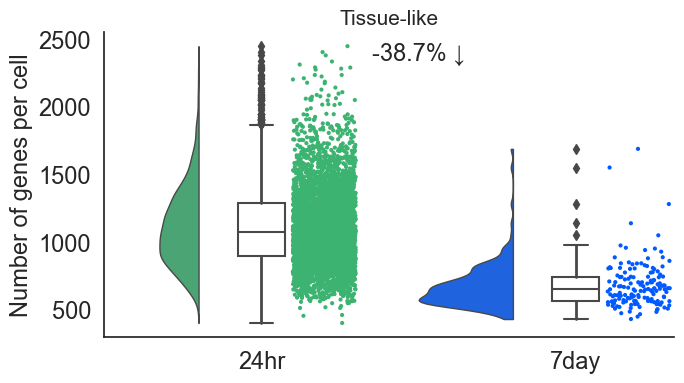

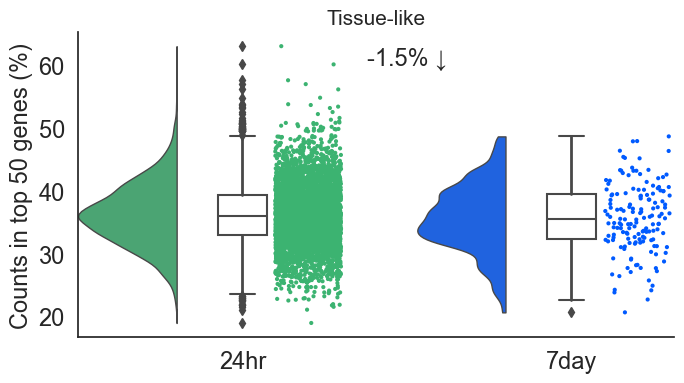

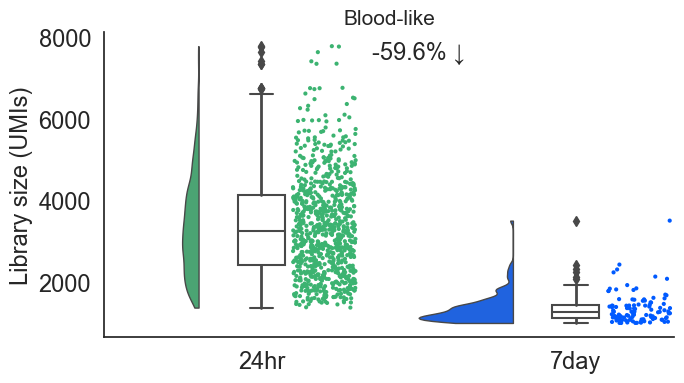

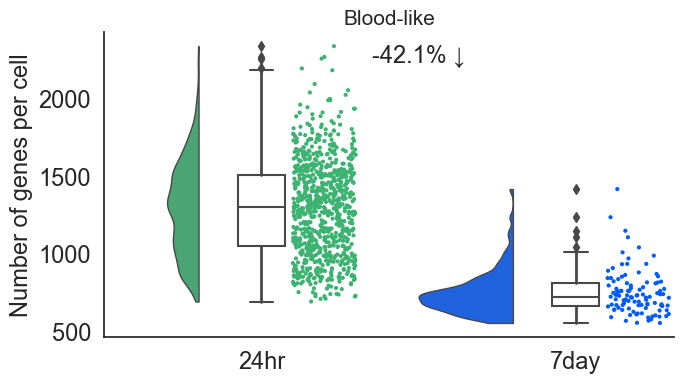

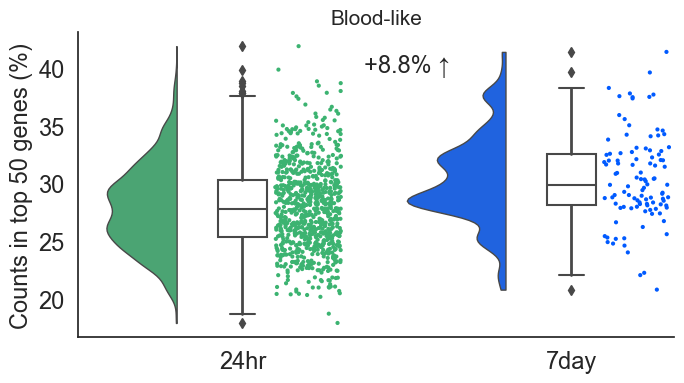

In [50]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

# Load data
adata = sc.read_h5ad("wound_neutro_with_broad_type.h5ad")

# Subset to 24hr and 7day only
adata = adata[adata.obs['time_point'].isin(['24hr', '7day'])]

# Create a DataFrame from .obs with only needed columns
df = adata.obs[[
    'time_point', 
    'broad_neutro_type',
    'total_counts',
    'n_genes_by_counts',
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Plot style
sns.set(style="white")

# Color palettes
neutro_palette = {
    'Blood-like': '#ff7f00',
    'Tissue-like': '#377eb8'
}
time_palette = {
    '24hr': '#3cb371',
    '7day': '#005aff'
}

# Function to plot with annotated percent difference
def plot_raincloud_by_neutro_type(data, metric, neutro_label):
    f, ax = plt.subplots(figsize=(7, 4))
    
    # Plot raincloud
    pt.RainCloud(
        x='time_point',
        y=metric,
        data=data,
        palette=time_palette,
        width_viol=.6,
        ax=ax,
        orient='v',
        move=0.2
    )

    # Axis styling
    sns.despine(ax=ax)
    ax.set_xlabel('', fontsize=17)
    ax.set_ylabel(metric, fontsize=17)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17)
    ax.set_title(neutro_label, fontsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('time_point')[metric].mean()
    if '24hr' in means and '7day' in means:
        mean_24 = means['24hr']
        mean_7 = means['7day']
        percent_diff = ((mean_7 - mean_24) / mean_24) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"

        # Place annotation in data coordinates
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92  # adjust if needed
        ax.text(0.5, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()

# Loop over neutrophil types and metrics
neutro_types = df['broad_neutro_type'].unique()
metrics = ['Library size (UMIs)', 'Number of genes per cell', 'Counts in top 50 genes (%)']

for neutro in neutro_types:
    df_sub = df[df['broad_neutro_type'] == neutro]
    for metric in metrics:
        plot_raincloud_by_neutro_type(df_sub, metric, neutro)